# Семинар 12: знакомство с PyTorch

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

### План семинара:

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision

from sklearn.datasets import fetch_california_housing
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.65174126, 0.77842035, 0.34388962],
       [0.90945438, 0.00380885, 0.04836108],
       [0.96099279, 0.82406615, 0.42598225],
       [0.84392501, 0.60703093, 0.9872551 ],
       [0.58278908, 0.35238057, 0.16597746]])

In [3]:
# размеры массива
a.shape

(5, 3)

In [4]:
# сложение
a + 5

array([[5.65174126, 5.77842035, 5.34388962],
       [5.90945438, 5.00380885, 5.04836108],
       [5.96099279, 5.82406615, 5.42598225],
       [5.84392501, 5.60703093, 5.9872551 ],
       [5.58278908, 5.35238057, 5.16597746]])

In [5]:
# матричное умножение
a @ a.T

array([[1.14896498, 0.6123247 , 1.41427939, 1.36205275, 0.71120582],
       [0.6123247 , 0.82946058, 0.89771881, 0.81756811, 0.53938909],
       [1.41427939, 0.89771881, 1.78405305, 1.73179264, 0.92114446],
       [1.36205275, 0.81756811, 1.73179264, 2.05536859, 0.86959828],
       [0.71120582, 0.53938909, 0.92114446, 0.86959828, 0.49136369]])

In [6]:
# среднее по колонкам
a.mean(axis=-1)

array([0.59135041, 0.32054144, 0.73701373, 0.81273701, 0.36704904])

In [7]:
# решейп
a.reshape(3, 5).shape

(3, 5)

#### Разминка

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [8]:
# YOUR CODE

np.square(np.arange(1, 10_000 + 1)).sum()

333383335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [9]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.5315, 0.0912, 0.5862],
        [0.6113, 0.7768, 0.2609],
        [0.6000, 0.6973, 0.9501],
        [0.2356, 0.4539, 0.3834],
        [0.4049, 0.1895, 0.5923]])

In [10]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [11]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [12]:
# сложение
x + 5

tensor([[5.5315, 5.0912, 5.5862],
        [5.6113, 5.7768, 5.2609],
        [5.6000, 5.6973, 5.9501],
        [5.2356, 5.4539, 5.3834],
        [5.4049, 5.1895, 5.5923]])

In [13]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[0.6344, 0.5486, 0.9394, 0.3913, 0.5797],
        [0.5486, 1.0452, 1.1563, 0.5967, 0.5492],
        [0.9394, 1.1563, 1.7489, 0.8221, 0.9378],
        [0.3913, 0.5967, 0.8221, 0.4085, 0.4085],
        [0.5797, 0.5492, 0.9378, 0.4085, 0.5506]])

In [14]:
# очередное матричное умножение
x.mm(x.t())

tensor([[0.6344, 0.5486, 0.9394, 0.3913, 0.5797],
        [0.5486, 1.0452, 1.1563, 0.5967, 0.5492],
        [0.9394, 1.1563, 1.7489, 0.8221, 0.9378],
        [0.3913, 0.5967, 0.8221, 0.4085, 0.4085],
        [0.5797, 0.5492, 0.9378, 0.4085, 0.5506]])

In [15]:
# поэлементное умножение
x * x

tensor([[0.2825, 0.0083, 0.3436],
        [0.3736, 0.6035, 0.0680],
        [0.3600, 0.4862, 0.9027],
        [0.0555, 0.2061, 0.1470],
        [0.1639, 0.0359, 0.3508]])

In [16]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.4030, 0.5497, 0.7491, 0.3576, 0.3956])

In [17]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [18]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [19]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [20]:
# YOUR CODE

# .item() возвращает число из тензора.
# Без этого будет тензор размерности 1x1

torch.square(torch.arange(1, 10_000 + 1)).sum().item()

333383335000

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [21]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.4013e-45],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [22]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.2520, 0.1443, 0.7711],
        [0.9889, 0.1968, 0.5755],
        [0.8088, 0.3937, 0.8500],
        [0.9392, 0.6258, 0.1713],
        [0.3137, 0.4306, 0.4084]])

In [23]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [24]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [25]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [26]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[-0.0759,  1.5217,  1.3453],
        [ 1.3314, -0.2982, -0.5487],
        [ 0.9390, -0.4652, -2.6180],
        [ 0.4822, -0.3327, -0.1274],
        [ 0.2607, -1.6848, -2.1619]])

In [27]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [28]:
x

tensor([[0.4452, 0.5764, 0.6437],
        [0.7830, 0.3701, 0.8534],
        [0.2879, 0.0456, 0.1036],
        [0.6436, 0.4292, 0.5431],
        [0.8096, 0.1570, 0.5669]])

In [29]:
y

tensor([[0.8093, 0.6509, 0.7582],
        [0.8616, 0.3148, 0.5000],
        [0.5562, 0.6716, 0.1712],
        [0.6133, 0.5748, 0.1289],
        [0.6247, 0.4719, 0.7436]])

In [30]:
# сложение
x + y

tensor([[1.2544, 1.2273, 1.4020],
        [1.6445, 0.6849, 1.3534],
        [0.8441, 0.7171, 0.2748],
        [1.2569, 1.0040, 0.6720],
        [1.4343, 0.6289, 1.3105]])

In [31]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[1.2544, 1.2273, 1.4020],
        [1.6445, 0.6849, 1.3534],
        [0.8441, 0.7171, 0.2748],
        [1.2569, 1.0040, 0.6720],
        [1.4343, 0.6289, 1.3105]])

In [32]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[1.2544, 1.2273, 1.4020],
        [1.6445, 0.6849, 1.3534],
        [0.8441, 0.7171, 0.2748],
        [1.2569, 1.0040, 0.6720],
        [1.4343, 0.6289, 1.3105]])

In [33]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [34]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [35]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [36]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [37]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [38]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [39]:
np.allclose(x[:, 1], a[:, 1])

True

In [40]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [41]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

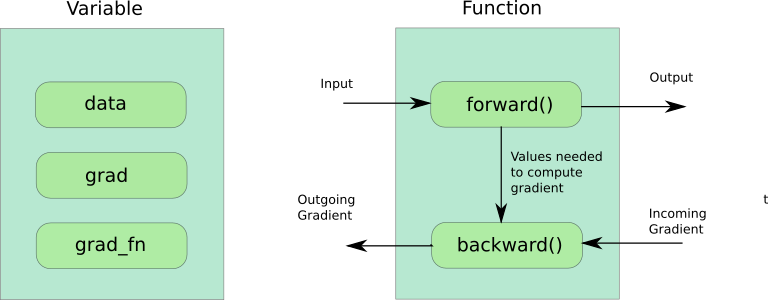

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

#### Разминка с градиентами

Дана функция: $$\large  f(x,y,z) = (x + y) * max(y, z)$$.

вычислите производные для $x, y, z$ в точке $(1, 2, 0)$ с помощью `tensor.backward()` и `tensor.grad`.

In [42]:
# YOUR CODE

# Определяем x, y и z
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
z = torch.tensor(0., requires_grad=True)

# Зададим q как сумму x и y, также зададим f как произведение q на max(y,z)
q = x + y
f = q * torch.max(y,z)

# Вычисляем производную
f.backward()

# Печатаем значения
print("Derivative of f by x is: " + str(x.grad))
print("Derivative of f by y is: " + str(y.grad))
print("Derivative of f by z is: " + str(z.grad))

Derivative of f by x is: tensor(2.)
Derivative of f by y is: tensor(5.)
Derivative of f by z is: tensor(0.)


[California](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)

X: MedInc (median income in block group).

y: the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

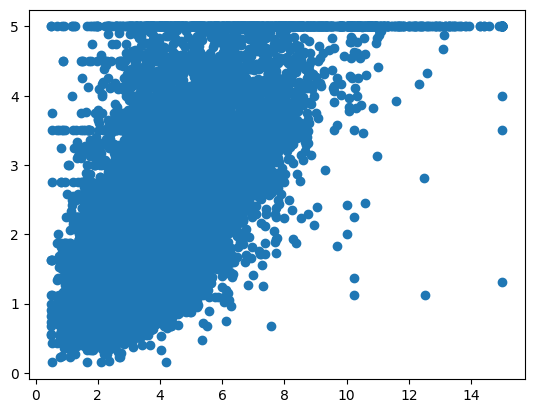

In [43]:
housing = fetch_california_housing()
plt.scatter(housing.data[:, 0], housing.target);

In [44]:
w = torch.rand(1, requires_grad=True) # задайте torch.rand с 1 и requires_grad=True
b = torch.rand(1, requires_grad=True) # задайте torch.rand с 1 и requires_grad=True

x = torch.tensor(housing.data[:, 0] / housing.data[:, 0].max(), dtype=torch.float32)
y = torch.tensor(housing.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [45]:
x.size(), y.size()

(torch.Size([20640]), torch.Size([20640]))

In [46]:
# YOUR CODE

y_pred = w * x + b # определите y_pred в виде линейного уравнения для w, x и b
loss = torch.mean((y_pred - y) ** 2) # задайте MSE loss с помощью torch.mean для y_pred и y
loss.backward() # реализайте backward для loss

In [47]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-0.7819])
dL/db = tensor([-2.2983])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [48]:
w.data, w.grad

(tensor([0.3829]), tensor([-0.7819]))

In [49]:
w

tensor([0.3829], requires_grad=True)

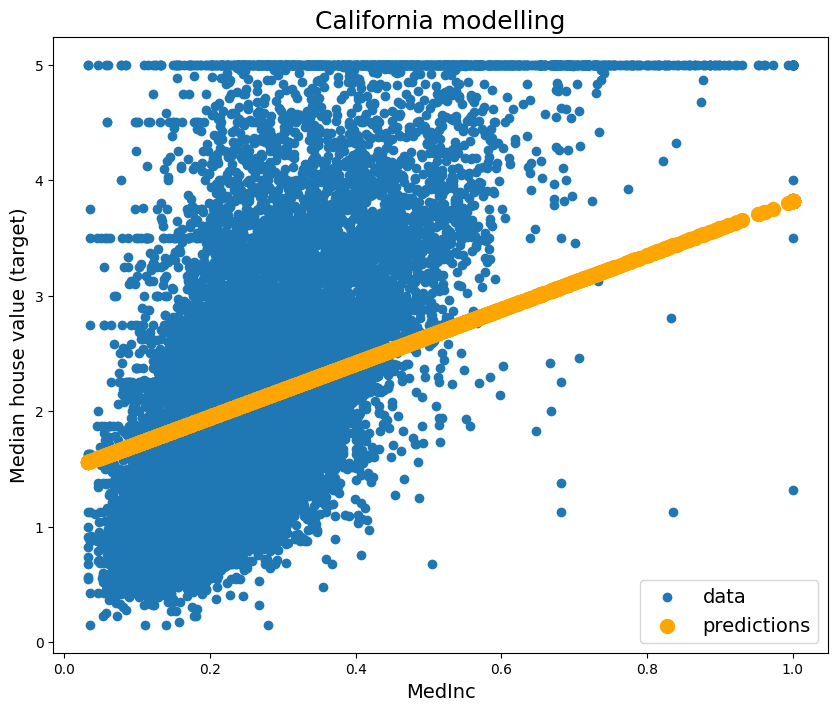

loss =  0.9493938
Done!


In [50]:
from IPython.display import clear_output

for i in range(300):
    ### BEGIN SOLUTION
    y_pred = w * x + b # определите y_pred в виде линейного уравнения для w, x и b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2) # задайте MSE loss с помощью torch.mean для y_pred и y
    loss.backward() # реализайте backward для loss
    ### END SOLUTION

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("MedInc", fontsize=14)
        plt.ylabel("Median house value (target)", fontsize=14)
        plt.title("California modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.95:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [51]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {"sample": torch.tensor(self.x[idx, :], dtype=torch.float), "target": self.y[idx]}

In [52]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [53]:
our_dataset = RandomDataset(x, y)

In [54]:
our_dataset.__getitem__(1)

{'sample': tensor([0.1364, 0.6002, 0.5517, 0.0302, 0.8566]),
 'target': 0.14885024552412363}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [55]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [56]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.3007, 0.2754, 0.5849, 0.1886, 0.3740],
        [0.1364, 0.6002, 0.5517, 0.0302, 0.8566],
        [0.7288, 0.6887, 0.8503, 0.0476, 0.5030],
        [0.4220, 0.1113, 0.7173, 0.3450, 0.7160]])
Target:
tensor([0.1156, 0.1489, 0.6943, 0.8622], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [57]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 30))  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(30, 1))  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [58]:
y_pred = model(batch['sample'])  # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [59]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train,
    batch_size=4,
    shuffle=True,
    num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val,
    batch_size=4,
    shuffle=False,
    num_workers=1
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 486kB/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.61MB/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



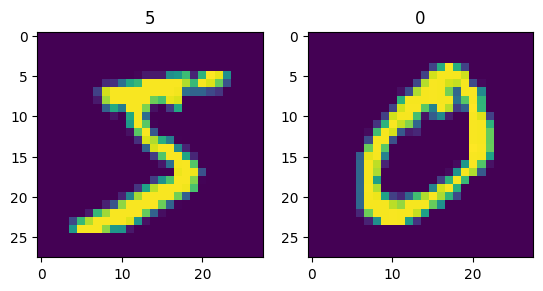

In [60]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [61]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [62]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[-0.0032, -0.0289, -0.0025,  ..., -0.0270, -0.0343,  0.0228],
          [ 0.0349,  0.0086, -0.0305,  ..., -0.0289, -0.0199,  0.0230],
          [ 0.0103, -0.0033, -0.0203,  ...,  0.0252, -0.0106, -0.0292],
          ...,
          [ 0.0109,  0.0205,  0.0119,  ...,  0.0084,  0.0271,  0.0018],
          [ 0.0033, -0.0308, -0.0326,  ...,  0.0300, -0.0096, -0.0034],
          [-0.0128, -0.0063, -0.0297,  ...,  0.0014,  0.0032, -0.0008]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0021, -0.0316, -0.0179,  0.0062,  0.0036,  0.0261, -0.0294, -0.0059,
          -0.0305, -0.0326, -0.0173, -0.0007, -0.0309,  0.0152, -0.0262,  0.0002,
           0.0313, -0.0097, -0.0079, -0.0209,  0.0103, -0.0344,  0.0304,  0.0265,
          -0.0307, -0.0135, -0.0193,  0.0229,  0.0271, -0.0065, -0.0028,  0.0135,
          -0.0194, -0.0150,  0.0240, -0.0342,  0.0180,  0.0304, -0.0285, -0.0296,
          -0.0332, -0.0184,  0.0027, 

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [ ]:
# !pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [64]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из валидационного лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})

        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.11548061668872833, accuracy: 0.9662


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08640036731958389, accuracy: 0.9726


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08556963503360748, accuracy: 0.9747


### Дополнительные материалы:

* [Хорошая книга про pytorch](https://github.com/borninfreedom/DeepLearning/blob/master/Books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](https://www.cs.toronto.edu/~duvenaud/talks/Johnson-Automatic-Differentiation.pdf)